In [1]:
#basic package
import json
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import shutil
import time
import datetime as dt
import itertools
import time
import re
from collections import Counter
from collections import defaultdict
import operator
import math
import functools
import collections

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from UTILS_LK import preprocessing_experiment2, general_cleaning, bining,verification_based_on_initial_record,\
HenVariable, print_color, boxplot_distribution_entropy, heatmap_duration_perzone_perhen, \
time_series_henColumn_tsRow, cleaning_mouvement_records
import config_experiment2 as config

C:\Users\camil\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Define parameters

In [3]:
print('change the configuration file if not done yet!')
path_extracted_data = config.path_extracted_data
id_run = config.id_run
dico_matching = config.dico_matching
print(id_run)
#print('The date that will be removed are: \n %s'%' \n '.join([str(d) for d in sorted(config.li_date2remove)]))

change the configuration file if not done yet!
VFVFVF_


# Preprocessing

path_initial_data = r'R:\VPHI\Welfare\2- Research Projects\Laura C-Klara G\tracking_Data'
#Note that as there is no standardize name (i.e. start with log_), we will simply open all csv files. If there is other csv file
#it wont work
p = glob.glob(os.path.join(path_initial_data,'TagUpdates*_*','*.csv'))
#print('There is %d log files:\n  %s'%(len(p),'  \n  '.join(p)))
path_FocalBird = os.path.join(path_initial_data,'full_tagID_long.xlsx')
df = preprocessing_experiment2(p, path_FocalBird, config)
print(df.shape)
display(df.head(3))
display(df.tail(3))

# Cleaning

### general cleaning (adding ms)

#for being more reproductible, we open the file that was saved from cleaning
df = pd.read_csv(os.path.join(path_extracted_data, id_run+'_PreprocessRecords.csv'), sep=';', parse_dates=['Timestamp'],
                 index_col=0) 
print(df.shape)
df.head(3)

#same for each experiment
df = general_cleaning(df, config)
print(df.shape)
df.tail(3)

### cleaning rules info

Only if needed. Exemple check if system is working better after recalibration

#for being more reproductible, we open the file that was saved from cleaning
df = pd.read_csv(os.path.join(path_extracted_data, id_run+'_records_GeneralCleaning.csv'), sep=';', 
                 parse_dates=['Timestamp', 'Timestamp_initial', 'day']) 
print(df.shape)
df.head(3)

df = cleaning_mouvement_records(df, config, nbr_block_repetition=3, flickering_type1=True)
print(df.shape)
df

### Binning

In [4]:
#for being more reproductible, we open the file that was saved from cleaning
df = pd.read_csv(os.path.join(path_extracted_data, id_run+'_records_GeneralCleaning.csv'), sep=';', 
                 parse_dates=['Timestamp', 'Timestamp_initial', 'date']) 
print(df.shape)
df.tail(3)

(12453168, 10)


,Timestamp,HenID,Zone,PenID,log_file_name,date,ts_order_logname,ts_order_list,ms,Timestamp_initial
12453165,2020-07-18 23:59:56,hen_51,2 Zone,3,2020-07-15_224155_2020-07-19_055005csv,2020-07-18,2020-07-15_224155_2020-07-19_055005csv_98992,2020-07-15_224155_2020-07-19_055005csv_98992,0.0,2020-07-18 23:59:56
12453166,2020-07-18 23:59:59,hen_8,5 Zone,12,2020-07-15_054035_2020-07-19_041254csv,2020-07-18,2020-07-15_054035_2020-07-19_041254csv_84479,2020-07-15_054035_2020-07-19_041254csv_84479,0.0,2020-07-18 23:59:59
12453167,2020-07-18 23:59:59,hen_82,5 Zone,11,2020-07-15_054035_2020-07-19_041254csv,2020-07-18,2020-07-15_054035_2020-07-19_041254csv_84480,2020-07-15_054035_2020-07-19_041254csv_84480,0.0,2020-07-18 23:59:59


In [5]:
df['PenID'].unique()

array([10, 12, 11,  4,  5,  3], dtype=int64)

In [6]:
for p in df['PenID'].unique():
    print(p)
    df_final = simple_cleaning_experiment2(df[df['PenID']==p], config, 60,p)

10
create time series
in this time series there is 18 hens
The initial starting date in over all is: 2019-10-22 07:37:52, and the ending date will be: 2020-07-18 23:53:19
But note that birds may have different ending and starting date
and after ending the last day at midnight : 2019-10-22 07:37:52, and the ending date will be: 2020-07-18 23:59:59
-------------- Lets save
(23386928, 20)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\camil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-a2f72d19c7c3>", line 3, in <module>
    df_final = simple_cleaning_experiment2(df[df['PenID']==p], config, 60,p)
  File "C:\Users\camil\Desktop\animals_code\PhD\UTILS.py", line 745, in simple_cleaning_experiment2
    df_ts = time_series_henColumn_tsRow(df, config, col_ts='Zone', save=True, hen_time_series=False)
  File "C:\Users\camil\Desktop\animals_code\PhD\UTILS.py", line 1424, in time_series_henColumn_tsRow
    df_hens.to_csv(os.path.join(path_extracted_data,id_run+'_TimeSeries'+str(name_)+'.csv'), sep=';', index=False)
  File "C:\Users\camil\Anaconda3\lib\site-packages\pandas\core\generic.py", line 3167, in to_csv
    formatter.save()
  File "C:\Users\camil\Anaconda3\lib\site-packages\pandas\io\formats\csvs.py", line 206, in save
    self._save()
  File "C:\User

TypeError: object of type 'NoneType' has no len()

#### turn all bining hens time series into the usual ts csv file (one column per hen)

In [7]:
#for path_ in glob.glob(os.path.join(path_extracted_data, 'HensTimeSeries', id_run+'_ts_MostFrequentZone_period60_?_?_hen_*.csv')):
li_df = []
for path_ in tqdm.tqdm(glob.glob(os.path.join(path_extracted_data, 'HensTimeSeries', 
                                    id_run+'_ts_MostFrequentZone_period60_2019-11-01_2020-03-26_hen_*.csv'))):
    name_ = path_.split('\\')[-1].split('_MostFrequentZone_')[-1].split('.csv')[0]
    HenID = 'hen_'+name_.split('hen_')[-1]
    df_h = pd.read_csv(path_, sep=';', parse_dates=['New_Timestamp']) 
    df_h = df_h.filter(['New_Timestamp','most_frequent_zone'],axis=1).reset_index(drop=True)
    df_h.rename(columns={'most_frequent_zone':HenID}, inplace=True)
    li_df.append(df_h)

df = pd.DataFrame(columns=['New_Timestamp'])
for df_h in li_df:
    df = pd.merge(df, df_h, on='New_Timestamp', how='outer')
df.to_csv(os.path.join(path_extracted_data,id_run+'ts_MostFrequentZone_period60_2019-11-01_2020-03-26_allhens.csv'), sep=';', index=False)
print(df.shape)
df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:08<00:00, 13.44it/s]


(30241, 109)


,New_Timestamp,hen_1,hen_10,hen_100,hen_101,hen_102,hen_103,hen_104,hen_105,hen_106,...,hen_90,hen_91,hen_92,hen_93,hen_94,hen_95,hen_96,hen_97,hen_98,hen_99
0,2019-11-01 00:00:00,2 Zone,2 Zone,2 Zone,3 Zone,2 Zone,3 Zone,5 Zone,5 Zone,3 Zone,...,4 Zone,5 Zone,4 Zone,5 Zone,5 Zone,5 Zone,3 Zone,3 Zone,2 Zone,5 Zone
1,2019-11-01 00:01:00,2 Zone,2 Zone,2 Zone,3 Zone,2 Zone,3 Zone,5 Zone,5 Zone,3 Zone,...,4 Zone,5 Zone,4 Zone,5 Zone,5 Zone,5 Zone,3 Zone,3 Zone,2 Zone,5 Zone
2,2019-11-01 00:02:00,2 Zone,2 Zone,2 Zone,3 Zone,2 Zone,3 Zone,5 Zone,5 Zone,3 Zone,...,4 Zone,5 Zone,4 Zone,5 Zone,5 Zone,5 Zone,3 Zone,3 Zone,2 Zone,5 Zone


In [8]:
df.tail(3)

,New_Timestamp,hen_1,hen_10,hen_100,hen_101,hen_102,hen_103,hen_104,hen_105,hen_106,...,hen_90,hen_91,hen_92,hen_93,hen_94,hen_95,hen_96,hen_97,hen_98,hen_99
30238,2019-11-21 23:58:00,5 Zone,2 Zone,2 Zone,5 Zone,3 Zone,3 Zone,5 Zone,4 Zone,3 Zone,...,3 Zone,2 Zone,5 Zone,1 Zone,2 Zone,5 Zone,5 Zone,2 Zone,2 Zone,5 Zone
30239,2019-11-21 23:59:00,5 Zone,2 Zone,2 Zone,5 Zone,3 Zone,3 Zone,5 Zone,4 Zone,3 Zone,...,3 Zone,2 Zone,5 Zone,1 Zone,2 Zone,5 Zone,5 Zone,2 Zone,2 Zone,5 Zone
30240,2019-11-22 00:00:00,5 Zone,2 Zone,2 Zone,5 Zone,3 Zone,3 Zone,5 Zone,4 Zone,3 Zone,...,3 Zone,2 Zone,5 Zone,1 Zone,2 Zone,5 Zone,5 Zone,2 Zone,2 Zone,5 Zone


#VACCINATION 2
for minute in [0.5,1,2,3,4,5,10,30]:
    print('Lets compute with time interval ', minute)
    simple_cleaning_experiment2(df_ts, config, 
                                nbr_sec_mean=int(minute*60),
                                mi=dt.datetime(2019,12,20,0,0,0), 
                                ma=dt.datetime(2019,12,25,23,59,59))

# Looking at lost info depending on zones when bining

100%|████████████████████████████████████████████████████████████████████████████████| 258/258 [22:39<00:00,  5.27s/it]


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\vm_exchange\\AVIFORUM\\data\\extracted_info_experiment2_VFVFVF\\visual\\for_verification\\VFVFVF__percentage_lost_duration_during_bining2019-10-22_2020-07-18.png'

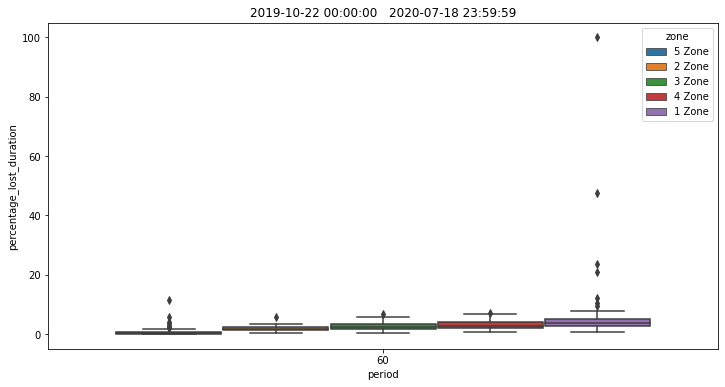

In [13]:
#this script is temporaire
li_path = glob.glob(os.path.join(path_extracted_data, 'HensTimeSeries', id_run+'_ts_MostFrequentZone_period*.csv'))

dico_mi_li_df = {}
for path_ in tqdm.tqdm(li_path):
    h = 'hen_'+path_.split('hen_')[1][:-4]
    if 'VERIFICATION' not in path_:
        period = int(path_.split('period')[1].split('_')[0])
        df_ = pd.read_csv(path_, sep=';', parse_dates=['New_Timestamp'])
        d1 = path_.split('period')[1].split('_')[1]
        d2 = path_.split('period')[1].split('_')[2]
        mi=dt.datetime(int(d1[0:4]),int(d1[5:7]),int(d1[8:]),0,0,0)
        ma=dt.datetime(int(d2[0:4]),int(d2[5:7]),int(d2[8:]),23,59,59)
        n = str(mi)+'   '+str(ma)
        df_['HenID'] = h
        #if 'nbr_lost_duration_per_zone' in df_.columns:
        df_['nbr_lost_duration_per_zone'] = df_['nbr_lost_duration_per_zone'].map(lambda x: eval(x))
        dico_ = dict(functools.reduce(operator.add, map(collections.Counter, df_['nbr_lost_duration_per_zone'].tolist()))) 
        df_['nbr_duration_per_zone'] = df_['nbr_duration_per_zone'].map(lambda x: eval(x))
        dico_all = dict(functools.reduce(operator.add, map(collections.Counter, df_['nbr_duration_per_zone'].tolist()))) 
        if n not in dico_mi_li_df:
            dico_mi_li_df[n] = []
        for z in dico_all.keys():
            dico_mi_li_df[n].append({'period':period, 'HenID':h, 
                                     'percentage_lost_duration':dico_.get(z,0)/dico_all[z]*100, 'zone': z})

#plot
for n, li_df in dico_mi_li_df.items():
    df_plot = pd.DataFrame(li_df)
    #plot for each datarange a plot showing the evolution of duration lost per zone and period
    fig, ax = plt.subplots(figsize=(12,6))
    ax = sns.boxplot(x="period", y="percentage_lost_duration", hue="zone", data=df_plot) #, palette="Set3")
    plt.title(n)
    plt.savefig(os.path.join(path_extracted_data,'visual','for_verification', 
                             id_run+'_percentage_lost_duration_during_bining'+n.split(':')[0][:-3]+'_'+n.split(':')[2][5:-3]+'.png'), dpi=300,
                             format='png', bbox_inches='tight')
    plt.show()

#-->zone 1: si flickering pas possible peut-être que nous devrons le garder en plus deu bining, puis choisir un bining 
#plus petit ou égale à 5mn peut etre :) 